In [2]:
import os
import sys
import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import xarray as xr

In [3]:
wow_hr_filename = './data/example_wow_hours.nc'
wow_hr_ds = xr.open_dataset(wow_hr_filename)

wow_min_filename = './data/example_wow_minutes.nc'
wow_min_ds = xr.open_dataset(wow_min_filename)

# wow_sec_filename = './data/example_wow_seconds.nc'    # error reading
wow_sec_filename = './data/latest/wow-nl-second.nc'    # second data on different path and not named as 'example'. Also, not 
wow_sec_ds = xr.open_dataset(wow_sec_filename)    


In [4]:
wow_hr_ds

<xarray.Dataset>
Dimensions:                           (timestamp: 328, location: 717)
Coordinates:
    lat                               (timestamp, location) float64 ...
  * location                          (location) object '23648819' ... '67c06...
    lon                               (timestamp, location) float64 ...
  * timestamp                         (timestamp) datetime64[ns] 2019-07-30 ....
Data variables: (12/13)
    AirPressure_Hectopascal           (timestamp, location) float64 ...
    DewPointTemperature_Celsius       (timestamp, location) float64 ...
    DryBulbTemperature_Celsius        (timestamp, location) float64 ...
    Height                            (timestamp, location) float64 ...
    MeanSeaLevelPressure_Hectopascal  (timestamp, location) float64 ...
    RainfallAmount_Millimetre         (timestamp, location) float64 ...
    ...                                ...
    RelativeHumidity                  (timestamp, location) float64 ...
    WindDirection                     (timestamp, location) float64 ...
    WindGust_Knot                     (timestamp, location) float64 ...
    WindGust_MetrePerSecond           (timestamp, location) float64 ...
    WindSpeed_Knot                    (timestamp, location) float64 ...
    WindSpeed_MetrePerSecond          (timestamp, location) float64 ...

In [5]:
wow_min_ds

<xarray.Dataset>
Dimensions:                           (timestamp: 19680, location: 717)
Coordinates:
    lat                               (timestamp, location) float64 ...
  * location                          (location) object '23648819' ... '67c06...
    lon                               (timestamp, location) float64 ...
  * timestamp                         (timestamp) datetime64[ns] 2019-07-30 ....
Data variables: (12/13)
    AirPressure_Hectopascal           (timestamp, location) float64 ...
    DewPointTemperature_Celsius       (timestamp, location) float64 ...
    DryBulbTemperature_Celsius        (timestamp, location) float64 ...
    Height                            (timestamp, location) float64 ...
    MeanSeaLevelPressure_Hectopascal  (timestamp, location) float64 ...
    RainfallAmount_Millimetre         (timestamp, location) float64 ...
    ...                                ...
    RelativeHumidity                  (timestamp, location) float64 ...
    WindDirection                     (timestamp, location) float64 ...
    WindGust_Knot                     (timestamp, location) float64 ...
    WindGust_MetrePerSecond           (timestamp, location) float64 ...
    WindSpeed_Knot                    (timestamp, location) float64 ...
    WindSpeed_MetrePerSecond          (timestamp, location) float64 ...

In [6]:
wow_sec_ds

<xarray.Dataset>
Dimensions:                           (timestamp: 165, location: 651)
Coordinates:
    lat                               (timestamp, location) float64 ...
  * location                          (location) object '45e53cd3-4479-e811-9...
    lon                               (timestamp, location) float64 ...
  * timestamp                         (timestamp) datetime64[ns] 2019-07-15 ....
Data variables: (12/13)
    AirPressure_Hectopascal           (timestamp, location) float64 ...
    DewPointTemperature_Celsius       (timestamp, location) float64 ...
    DryBulbTemperature_Celsius        (timestamp, location) float64 ...
    Height                            (timestamp, location) float64 ...
    MeanSeaLevelPressure_Hectopascal  (timestamp, location) float64 ...
    RainfallAmount_Millimetre         (timestamp, location) float64 ...
    ...                                ...
    RelativeHumidity                  (timestamp, location) float64 ...
    WindDirection                     (timestamp, location) float64 ...
    WindGust_Knot                     (timestamp, location) float64 ...
    WindGust_MetrePerSecond           (timestamp, location) float64 ...
    WindSpeed_Knot                    (timestamp, location) float64 ...
    WindSpeed_MetrePerSecond          (timestamp, location) float64 ...

In [7]:
file_list_wow_csv = sorted(glob.glob('./wow_csv_sample_data/Diego_3007/WOW_NL_20190730*.csv'))
file_list_wow_csv

['./wow_csv_sample_data/Diego_3007/WOW_NL_2019073000.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073001.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073002.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073003.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073004.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073005.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073006.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073007.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073008.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073009.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073010.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073011.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073012.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073013.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073014.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073015.csv',
 './wow_csv_sample_data/Diego_3007/WOW_NL_2019073016.csv

In [8]:
wow_csv_df = pd.concat(map(lambda file: pd.read_csv(file, sep=';',parse_dates=['CreatedDateTime','ReportEndDateTime','LocalReportEndDateTime']), file_list_wow_csv))
wow_csv_df.sort_values(by=['SiteId', 'ReportEndDateTime'],inplace=True,ignore_index=True)
wow_csv_df.head()

,rowid,Id,SiteId,CreatedDateTime,ReportEndDateTime,LocalReportEndDateTime,Latitude,Longitude,ObservationType,SubmissionType,...,RelativeHumidity,AirPressure_Hectopascal,RainfallAmount_Millimetre,RainfallRate_MillimetrePerHour,WindDirection,WindGust_Knot,WindGust_MetrePerSecond,WindSpeed_Knot,WindSpeed_MetrePerSecond,MeanSeaLevelPressure_Hectopascal
0,4744,20190730dce5abp1mwe6ucrdyyb96sczue,0035f568-ee98-e911-80e7-0003ff59889d,2019-07-30 00:00:59.861493700+00:00,2019-07-30 00:00:00+00:00,2019-07-30 02:00:00+00:00,50.8769,4.711,1,detailed,...,83.0,NaN,0.0,0.0,354.0,NaN,0.0,NaN,0.0,1006.77345
1,4339,20190730i7dzq7f1mwe6ucrdyyb96sczue,0035f568-ee98-e911-80e7-0003ff59889d,2019-07-30 00:05:16.390946200+00:00,2019-07-30 00:05:00+00:00,2019-07-30 02:05:00+00:00,50.8769,4.711,1,detailed,...,83.0,NaN,0.0,0.0,354.0,NaN,0.0,NaN,0.0,1006.77345
2,4046,20190730psxzq4p1mae6ucrdyyb96sczue,0035f568-ee98-e911-80e7-0003ff59889d,2019-07-30 00:10:32.064665200+00:00,2019-07-30 00:10:00+00:00,2019-07-30 02:10:00+00:00,50.8769,4.711,1,detailed,...,83.0,NaN,0.0,0.0,354.0,NaN,0.0,NaN,0.0,1006.77345
3,3544,20190730fqkdubf1mhe6ucrdyyb96scn6h,0035f568-ee98-e911-80e7-0003ff59889d,2019-07-30 00:15:44.477164200+00:00,2019-07-30 00:15:00+00:00,2019-07-30 02:15:00+00:00,50.8769,4.711,1,detailed,...,84.0,NaN,0.0,0.0,354.0,NaN,0.0,NaN,0.0,1006.77345
4,3101,201907304x8y4hi1mhe6ucrdyyb96sczue,0035f568-ee98-e911-80e7-0003ff59889d,2019-07-30 00:20:30.270495700+00:00,2019-07-30 00:20:00+00:00,2019-07-30 02:20:00+00:00,50.8769,4.711,1,detailed,...,84.0,NaN,0.0,0.0,354.0,NaN,0.0,NaN,0.0,1006.77345


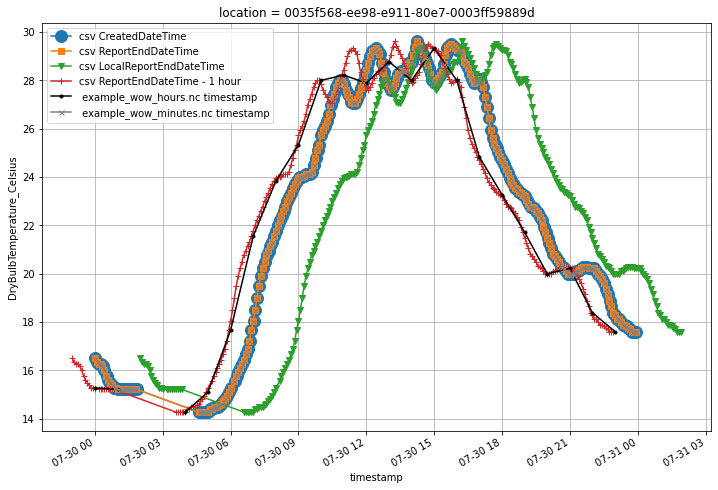

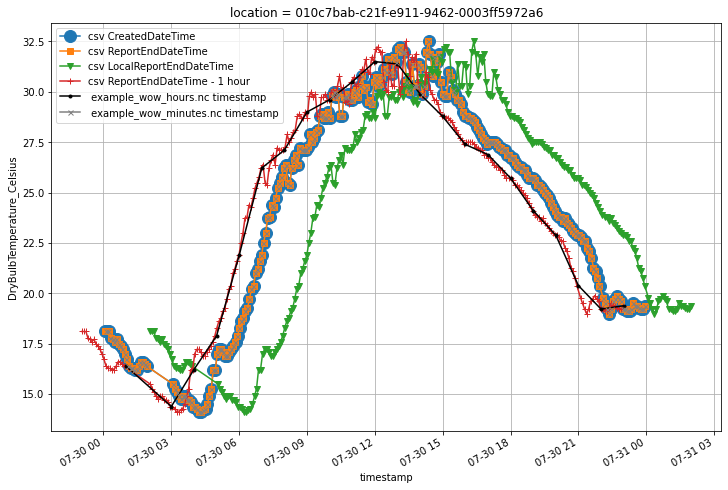

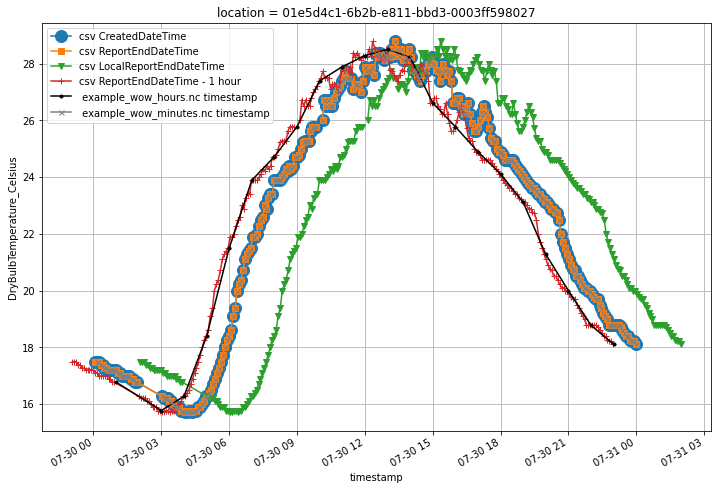

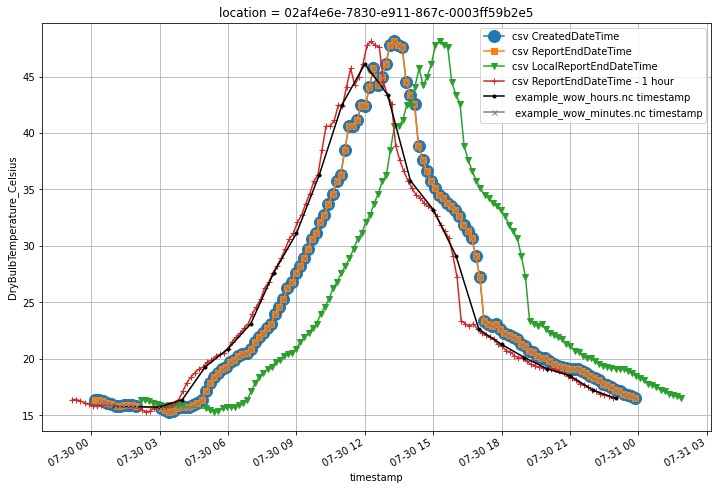

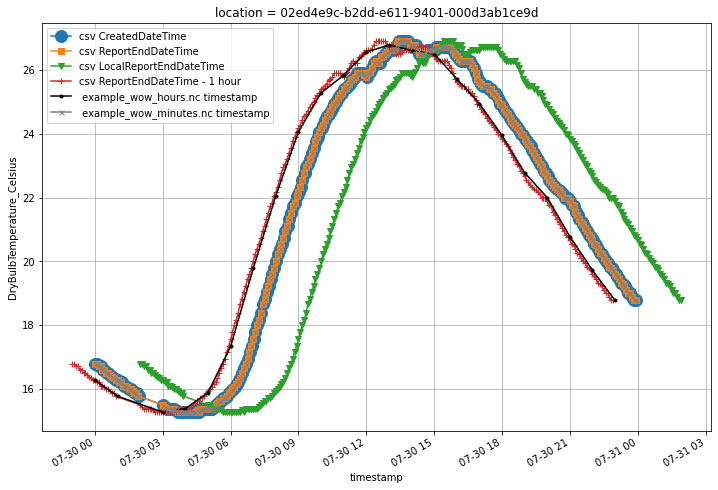

In [23]:
for SiteId_sel in wow_csv_df.SiteId.unique()[0:5]:
    # SiteId_sel = wow_csv_df.SiteId.unique()[0]
    timevarname_csv = 'ReportEndDateTime'
    # timevarname_csv = 'CreatedDateTime'
    # timevarname_csv = 'LocalReportEndDateTime'

    
    wow_csv_df_sel = wow_csv_df[wow_csv_df.SiteId == SiteId_sel]
    
    ti = wow_csv_df_sel.ReportEndDateTime.min().tz_localize(tz=None)
    tf = wow_csv_df_sel.ReportEndDateTime.max().tz_localize(tz=None)
    wow_hr_ds_sel = wow_hr_ds.sel(location=SiteId_sel).sel(timestamp = slice(ti,tf))
    wow_min_ds_sel = wow_min_ds.sel(location=SiteId_sel).sel(timestamp = slice(ti,tf))

    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(12, 7.5))

    ax.plot(wow_csv_df_sel.CreatedDateTime,wow_csv_df_sel.DryBulbTemperature_Celsius,'o-',label=f'csv CreatedDateTime',markersize = 12)
    ax.plot(wow_csv_df_sel.ReportEndDateTime,wow_csv_df_sel.DryBulbTemperature_Celsius,'s-',label=f'csv ReportEndDateTime')
    ax.plot(wow_csv_df_sel.LocalReportEndDateTime,wow_csv_df_sel.DryBulbTemperature_Celsius,'v-',label=f'csv LocalReportEndDateTime')

    ax.plot(wow_csv_df_sel.ReportEndDateTime-np.timedelta64(1,'h'),wow_csv_df_sel.DryBulbTemperature_Celsius,'+-',label=f'csv ReportEndDateTime - 1 hour')

    wow_hr_ds_sel.DryBulbTemperature_Celsius.plot(label = f' {os.path.basename(wow_hr_filename)} timestamp',color = 'k',marker='.')
    wow_min_ds_sel.DryBulbTemperature_Celsius.plot(label = f' {os.path.basename(wow_min_filename)} timestamp',color = [0.5,0.5,0.5],marker='x',markersize=5)
    


    plt.grid()

    plt.legend()
    

In [ ]:
'to be continued...'